<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Weight-average" data-toc-modified-id="Weight-average-1">Weight average</a></span><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1.1">Goal</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2">Imports</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-1.3">Code</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-1.4">Averages</a></span></li></ul></li></ul></div>

# Weight average

## Goal

The goal is to average the weights of the models with the hope that it will create a stronger model.

## Imports 

In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from tqdm.notebook import tqdm

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
#os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import tensorflow as tf
import tensorflow.keras as keras

%config Completer.use_jedi = False

In [2]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (30, 10)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Code

In [3]:
def plot_weight_variation(group_weights, variation_type='relative'):
    size_to_style = {
        1: '-.',
        2: '--',
        4: '-'
    }
    for idx, _ in enumerate(group_weights[0]):
        weights = np.array([weights[idx] for weights in group_weights])
        mean_axis = tuple(range(1, len(weights[0].shape)+1))
        
        if variation_type == 'relative':
            reference = weights[:-1]
        elif variation_type == 'cumulative':
            reference = weights[0:1]
        else:
            raise KeyError(variation_type)

        variation = np.mean(np.abs(weights[1:] - reference), axis=mean_axis)
        variation_normalized = variation / np.mean(np.abs(weights[1:]), axis=mean_axis)
        
        plt.plot(variation_normalized, size_to_style[len(mean_axis)], label='layer %i (ws %i)' % (idx, len(mean_axis)))
    plt.legend(loc=0)
    plt.ylabel('Weight normalized %s variation' % variation_type)
    plt.xlabel('Model idx')
    
def plot_two_views_of_weights_variation(group_weights):
    plt.subplot(121)
    plot_weight_variation(group_weights, 'cumulative')
    plt.subplot(122)
    plot_weight_variation(group_weights, 'relative')

In [4]:
def average_models_weights(input_folder, output_model_path, group_size, skip_first_ratio=0):
    model_paths = sorted(glob.glob(os.path.join(input_folder, '*.h5')))
    model_paths = model_paths[int(len(model_paths)*skip_first_ratio):]
    print('Found %i models' % len(model_paths))
    n_groups = len(model_paths)//group_size
    print('The average of the models will be done in %i groups' % n_groups)
    model = keras.models.load_model(model_paths[0], compile=False)
    averaged_weights = []
    for group_idx in tqdm(range(n_groups)):
        group_model_paths = model_paths[group_idx*group_size: (group_idx+1)*group_size]
        group_weights = load_weights(group_model_paths, model)
        averaged_weights.append(average_weights(group_weights))
    plot_two_views_of_weights_variation(averaged_weights)
    model.set_weights(average_weights(averaged_weights))
    model.save(output_model_path, include_optimizer=False)

def average_weights(group_weights):
    return [np.average([weights[idx] for weights in group_weights], axis=0) for idx, _ in enumerate(group_weights[0])]

def load_weights(model_paths, model=None):
    if model is None:
        model = keras.models.load_model(model_paths[0], compile=False)
    group_weights = []
    for model_path in tqdm(model_paths, leave=False):
        model.load_weights(model_path)
        group_weights.append(model.get_weights())
    return group_weights

## Averages

Found 2425 models
The average of the models will be done in 97 groups


  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

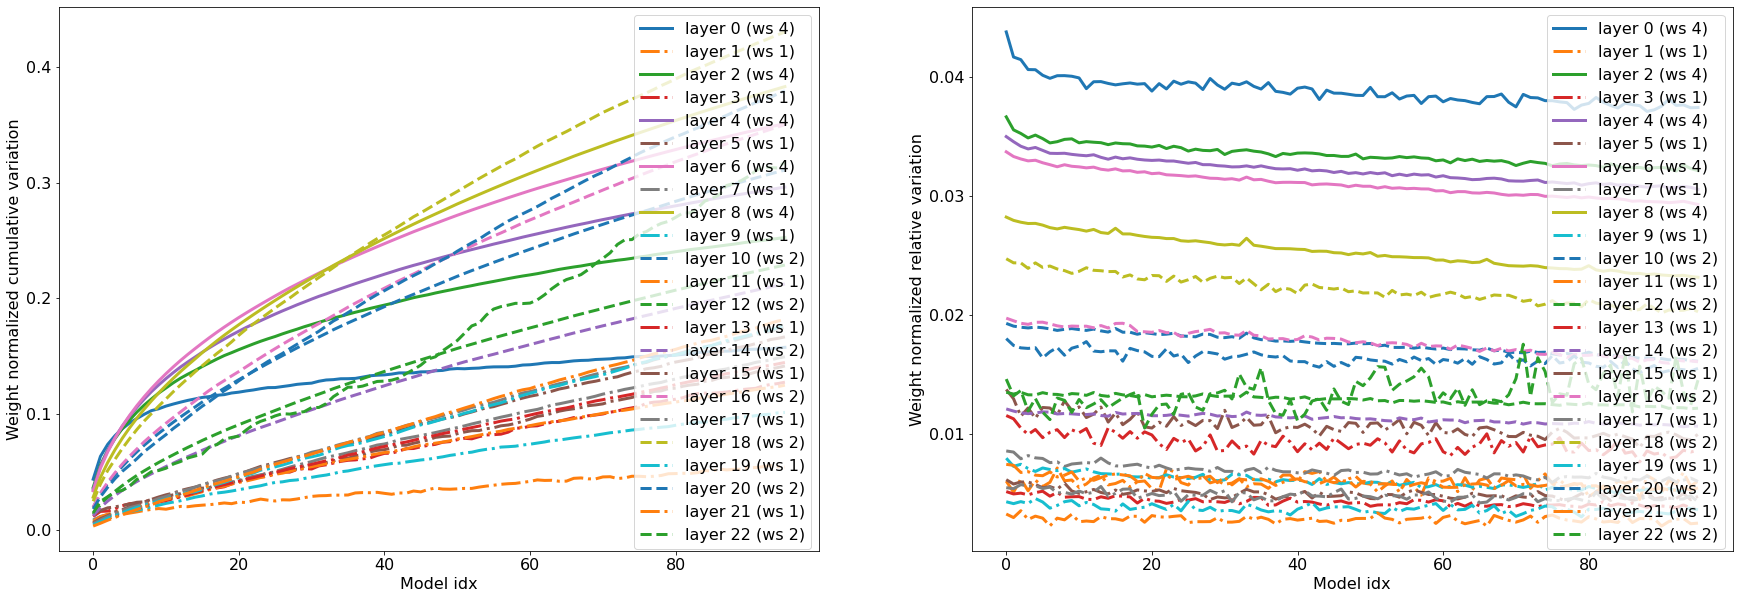

In [5]:
group_weights = average_models_weights(
    input_folder='/mnt/hdd0/Kaggle/hungry_geese/models/54_architecture_variations/04_continue_training_until_the_end_against_top10',
    output_model_path='/mnt/hdd0/Kaggle/hungry_geese/models/54_architecture_variations/04_continue_training_until_the_end_against_top10/weight_average.h5',
    group_size=25)

It is interesting to see how the weights change along the training. For example layer 0 has the bigggest relative variation but seems to be oscilating since cumulative change is not that big.

Found 1102 models
The average of the models will be done in 44 groups


  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

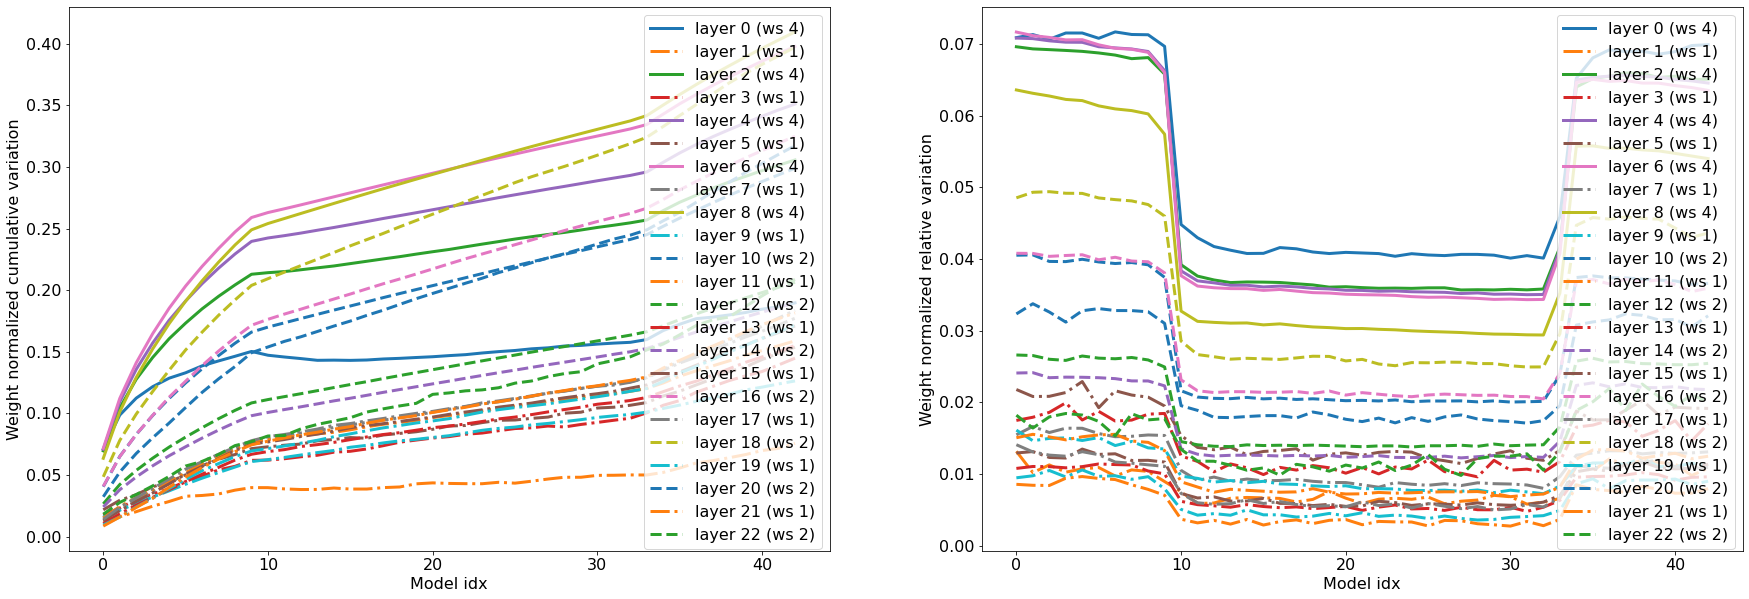

In [10]:
# domiciano
group_weights = average_models_weights(
    input_folder='/mnt/hdd0/Kaggle/hungry_geese/models/54_architecture_variations/03_even_more_filters_deeper_mlp/',
    output_model_path='/mnt/hdd0/Kaggle/hungry_geese/models/54_architecture_variations/03_even_more_filters_deeper_mlp/weight_average.h5',
    group_size=25,
    skip_first_ratio=0.5)

On this other average we can see the effect of changing the learning rate during training. 

The other models were deleted because I had problems with disk space :(